In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [7]:
df.drop('id',axis=1, inplace=True)

In [8]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
#df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
#df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
#df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
text_columns = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in text_columns:
    print(f"{i} : {df[i].dtype}")

packed_cell_volume : object
white_blood_cell_count : object
red_blood_cell_count : object


In [13]:
def convert_object_to_float(dataframe,column):
    dataframe[column]=pd.to_numeric(dataframe[column],errors='coerce')

In [14]:
for column in text_columns:
    convert_object_to_float(df,column)
    print(f"{column}:{df[column].dtype}")

packed_cell_volume:float64
white_blood_cell_count:float64
red_blood_cell_count:float64


In [15]:
missing = df.isnull().sum()
missing

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [16]:
missing[missing>0].sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [17]:
missing[missing>0].sort_values(ascending=False).head(20)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
bacteria                    4
pus_cell_clumps             4
hypertension                2
diabetes_mellitus           2
dtype: int64

In [18]:
def mean_value_imputation(dataframe,column_name):
    mean_value = dataframe[column_name].mean()
    dataframe[column_name].fillna(value=mean_value,inplace= True)


def mode_value_imputation(dataframe,column_name):
    mode_value = dataframe[column_name].mode()[0]
    dataframe[column_name] = dataframe[column_name].fillna(mode_value)
    

In [19]:
num_cols = [col for col in df.columns if df[col].dtype!='object'] #returns the column name which are not object i.e numeric column
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [20]:
for col_name in num_cols:
    mean_value_imputation(df,col_name)


C:\Users\parve\AppData\Local\Temp\ipykernel_14976\3702622277.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column_name].fillna(value=mean_value,inplace= True)


In [21]:
cat_cols = [col for col in df.columns if df[col].dtype =='object'] #returns the column name which are object i.e object column
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [22]:
for col_name in cat_cols:
    mode_value_imputation(df,col_name)

In [23]:
missing = df.isnull().sum()
missing

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [24]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [25]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease has ['no' 'yes' '\tno']
class has ['ckd' 'ckd\t' 'notckd']


In [26]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace={'\tno':'no',})
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd','notckd':'not ckd'})

In [27]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} and {df[col].unique()} and {df[col].dtype}")

red_blood_cells has 2 and ['normal' 'abnormal'] and object
pus_cell has 2 and ['normal' 'abnormal'] and object
pus_cell_clumps has 2 and ['notpresent' 'present'] and object
bacteria has 2 and ['notpresent' 'present'] and object
hypertension has 2 and ['yes' 'no'] and object
diabetes_mellitus has 2 and ['yes' 'no'] and object
coronary_artery_disease has 2 and ['no' 'yes'] and object
appetite has 2 and ['good' 'poor'] and object
peda_edema has 2 and ['no' 'yes'] and object
aanemia has 2 and ['no' 'yes'] and object
class has 2 and ['ckd' 'not ckd'] and object


In [28]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.000000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.000000,...,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,36.0,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


In [29]:
df['class'] = df['class'].map({'ckd': 1,'not ckd': 0})
df['red_blood_cells'] = df['red_blood_cells'].map({'normal':'1', 'abnormal':'0'})
df['pus_cell'] = df['pus_cell'].map({'normal':'1', 'abnormal':'0'})
df['pus_cell_clumps'] = df['pus_cell_clumps'].map({'notpresent':1, 'present':0})
df['bacteria'] = df['bacteria'].map({'notpresent':1, 'present':0})
df['hypertension'] = df['hypertension'].map({'yes':1, 'no':0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes':1, 'no':0})
df['coronary_artery_disease'] = df['coronary_artery_disease'].map({'yes':1, 'no':0})
df['appetite'] = df['appetite'].map({'good':1, 'poor':0})
df['peda_edema'] = df['peda_edema'].map({'yes':1, 'no':0})
df['aanemia'] = df['aanemia'].map({'yes':1, 'no':0})



In [30]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.000000,1.020,1.0,0.0,1,1,1,1,121.000000,...,44.0,7800.000000,5.200000,1,1,0,1,0,0,1
1,7.0,50.000000,1.020,4.0,0.0,1,1,1,1,148.036517,...,38.0,6000.000000,4.707435,0,0,0,1,0,0,1
2,62.0,80.000000,1.010,2.0,3.0,1,1,1,1,423.000000,...,31.0,7500.000000,4.707435,0,1,0,0,0,1,1
3,48.0,70.000000,1.005,4.0,0.0,1,0,0,1,117.000000,...,32.0,6700.000000,3.900000,1,0,0,0,1,1,1
4,51.0,80.000000,1.010,2.0,0.0,1,1,1,1,106.000000,...,35.0,7300.000000,4.600000,0,0,0,1,0,0,1
5,60.0,90.000000,1.015,3.0,0.0,1,1,1,1,74.000000,...,39.0,7800.000000,4.400000,1,1,0,1,1,0,1
6,68.0,70.000000,1.010,0.0,0.0,1,1,1,1,100.000000,...,36.0,8406.122449,4.707435,0,0,0,1,0,0,1
7,24.0,76.469072,1.015,2.0,4.0,1,0,1,1,410.000000,...,44.0,6900.000000,5.000000,0,1,0,1,1,0,1
8,52.0,100.000000,1.015,3.0,0.0,1,0,0,1,138.000000,...,33.0,9600.000000,4.000000,1,1,0,1,0,1,1
9,53.0,90.000000,1.020,2.0,0.0,0,0,0,1,70.000000,...,29.0,12100.000000,3.700000,1,1,0,0,0,1,1


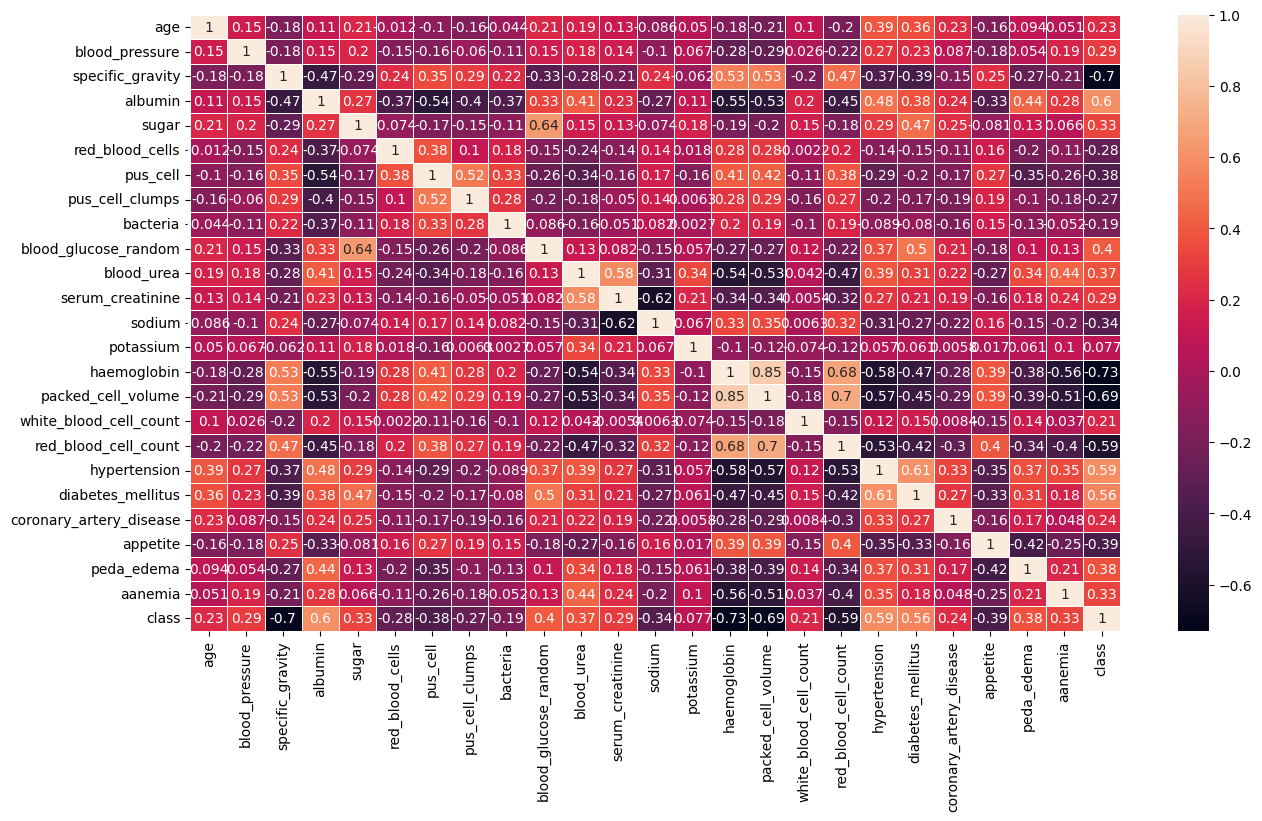

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)
plt.show()

In [32]:
target_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
aanemia                    0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [33]:
df['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [34]:
X = df.drop("class",axis = 1)
y = df['class']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_predict_dtc = dtc.predict(X_test)
y_predict_dtc

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [38]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 0.97
Confusion Matrix of DTC is 
 [[35  2]
 [ 1 62]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.97      0.98      0.98        63

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
model =[]
model.append(('Naive Bayes',GaussianNB()))
model.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
model.append(('RandomForestClassifier',RandomForestClassifier()))
model.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
model.append(('SVM',SVC(kernel='linear')))

In [55]:
for name,model in model:
    print(name,model)
    print('\n')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('\n')
    print('Precision :',precision_score(y_test,y_pred))
    print('\n')
    print('Recall :',recall_score(y_test,y_pred))
    print('\n')
    print('f1score',f1_score(y_test,y_pred))
    print('\n')

Naive Bayes GaussianNB()


[[37  0]
 [ 5 58]]


Accuracy : 0.95


Precision : 1.0


Recall : 0.9206349206349206


f1score 0.9586776859504132


KNN KNeighborsClassifier(n_neighbors=8)


[[31  6]
 [18 45]]


Accuracy : 0.76


Precision : 0.8823529411764706


Recall : 0.7142857142857143


f1score 0.7894736842105263


RandomForestClassifier RandomForestClassifier()


[[35  2]
 [ 0 63]]


Accuracy : 0.98


Precision : 0.9692307692307692


Recall : 1.0


f1score 0.984375


DecisionTreeClassifier DecisionTreeClassifier()


[[35  2]
 [ 2 61]]


Accuracy : 0.96


Precision : 0.9682539682539683


Recall : 0.9682539682539683


f1score 0.9682539682539683


SVM SVC(kernel='linear')


[[34  3]
 [ 5 58]]


Accuracy : 0.92


Precision : 0.9508196721311475


Recall : 0.9206349206349206


f1score 0.9354838709677419


